<a href="https://colab.research.google.com/github/tanvirhasanony/java-script-project-one/blob/master/CNN_VGG_commbine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow

In [ ]:
#get acess google drive data into google colab

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/dataset1.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('unzip successfully')

unzip successfully


In [ ]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import  Dropout
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# data augmentation
# our data set contains less number of data for this reason we use data augmentation
train_datagen = ImageDataGenerator(
        rotation_range=30,  # randomly rotate images 30 degrees
        zoom_range = 0.2, # Randomly zoom image 20%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        rescale=1/255, #scaling between 0 to 1
        shear_range=0.2 ,# Randomly share image 20%
        horizontal_flip=True,  # randomly flip images
        fill_mode='nearest') 

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/dataset1/train_set',
                                                 target_size = (224, 224),
                                                 batch_size = 2,
                                                 class_mode = 'binary')

Found 19478 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/dataset1/test_set',
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'binary')

Found 4837 images belonging to 2 classes.


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:


model1 = Sequential()
#add vgg-16
model1.add(vgg)
 
# adding Flattening layer
model1.add(layers.Flatten())
 
# adding fully connected layer
model1.add(layers.Dense(units=250, activation='relu'))

#reducing overfitting problem
model1.add(Dropout(0.5))
 
#adding output layer
model1.add(layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 250)               6272250   
_________________________________________________________________
dropout (Dropout)            (None, 250)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 251       
Total params: 20,987,189
Trainable params: 6,272,501
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# Compiling the CNN
# here we use adam optimizer 
#here we use binary_crossentropy because our dataset only have 2 types of data
model1.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
training_set.class_indices

{'maiz': 0, 'weed': 1}

In [ ]:
# fit the model
r = model1.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=9739, # steps_per_epocs  * batch_size = traindata set
  validation_steps=4837 # validation_steps  * batch_size = testdata set
)

Epoch 1/50
9739/9739 [==============================] - 329s 34ms/step - loss: 0.0394 - accuracy: 0.9913 - val_loss: 0.1157 - val_accuracy: 0.9826
Epoch 2/50
9739/9739 [==============================] - 331s 34ms/step - loss: 0.0337 - accuracy: 0.9921 - val_loss: 0.0154 - val_accuracy: 0.9977
Epoch 3/50
9739/9739 [==============================] - 330s 34ms/step - loss: 0.0288 - accuracy: 0.9930 - val_loss: 0.0171 - val_accuracy: 0.9973
Epoch 4/50
9739/9739 [==============================] - 330s 34ms/step - loss: 0.0322 - accuracy: 0.9933 - val_loss: 0.0159 - val_accuracy: 0.9975
Epoch 5/50
9739/9739 [==============================] - 326s 34ms/step - loss: 0.0314 - accuracy: 0.9940 - val_loss: 0.0277 - val_accuracy: 0.9975
Epoch 6/50
9739/9739 [==============================] - 319s 33ms/step - loss: 0.0321 - accuracy: 0.9933 - val_loss: 0.0254 - val_accuracy: 0.9961
Epoch 7/50
9739/9739 [==============================] - 320s 33ms/step - loss: 0.0322 - accuracy: 0.9935 - val_loss: 0

In [ ]:
import matplotlib.pyplot as plt

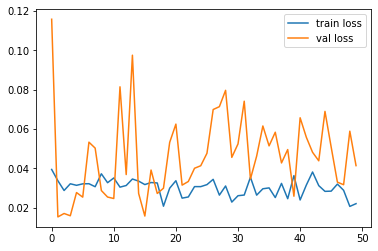

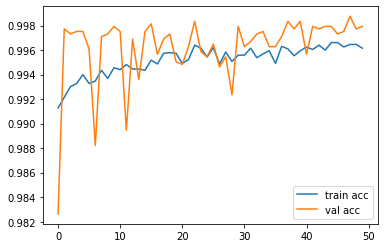

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [ ]:
model1.evaluate(test_set)

4837/4837 [==============================] - 46s 10ms/step - loss: 0.0414 - accuracy: 0.9979


[0.041380755603313446, 0.9979326128959656]

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model1.save('/content/drive/MyDrive/1cnn_vgg16.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/drive/MyDrive/1cnn_vgg16.h5')

In [ ]:
sample = "/content/drive/MyDrive/weed1.jpg"

In [ ]:
from keras.preprocessing import image
sample_image = image.load_img(sample,target_size=(224,224))

In [ ]:
sample_image = image.img_to_array(sample_image)
sample_image.shape

(224, 224, 3)

In [ ]:
import numpy as np
sample_image = np.expand_dims(sample_image,axis=0)
sample_image.shape

(1, 224, 224, 3)

In [ ]:
sample_image = sample_image/255

In [ ]:
prediction = model.predict(sample_image)
print(prediction)
print(prediction[0][0])
print( np.argmax(prediction, axis=1))

[[1.]]
1.0
[0]


In [ ]:
if prediction[0][0] < 0.5:
    output = 'maiz'
else:
    output = 'weed'
print(output)

weed
